In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Data description:

    1. Survival - Survival (0 = No; 1 = Yes)
    2. Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
    3. Name - Name of the Passenger
    4. Sex - Sex (M ; F)
    5. Age - Age
    6. Sibsp - Number of Siblings/Spouses Aboard
    7. Parch - Number of Parents/Children Aboard
    8. Ticket - Ticket Number
    9. Fare - Passenger Fare
    10. Cabin - Cabin
    11. Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We see that there are over 75% columns in Cabin which are null hence we could drop Cabin

In [6]:
df.drop('Cabin',axis=1,inplace=True)

In [7]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


we could drop name as well as i has no relation with Survival,Ticket are a set of alpha numeric columns which do not have any relation with survival and PassengerId is just a index 

In [10]:
df.drop(['Name','Ticket','PassengerId'],axis=1,inplace=True)

In [11]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [12]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

We have null values in 2 Features Age and Embarked, we could replace missing values in Age with mean and Embarked with Mode

In [13]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [14]:
df['Age'].fillna(round(df['Age'].mean(),0),inplace=True)

In [15]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

we do not have Null Values anymore

In [16]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

We see that there are 2 Object columns(Sex,Embarked) that will have to be taken care off

### EDA

<AxesSubplot:xlabel='Sex', ylabel='count'>

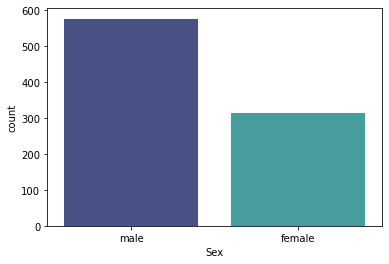

In [17]:
sns.countplot(df['Sex'],palette='mako')

We see that the number of male on board ship are higher than the Female

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

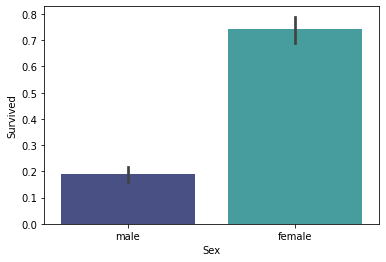

In [18]:
sns.barplot(x=df['Sex'],y=df['Survived'],palette='mako')

Survival Rate for Female is higher than Male

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

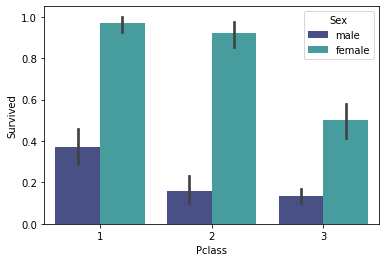

In [19]:
sns.barplot(x=df['Pclass'],y=df['Survived'],hue=df['Sex'],palette='mako')

We see that the survival rate of Passanger Class 1 is highest and Passanger Class 3 is Lowest

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

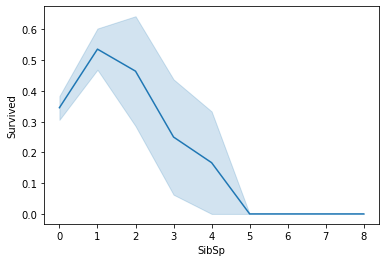

In [20]:
sns.lineplot(x=df['SibSp'],y=df['Survived'])

We see that the survival rate at Sibsp is ighest post which the survival rate decreases with increase in Sibsp

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

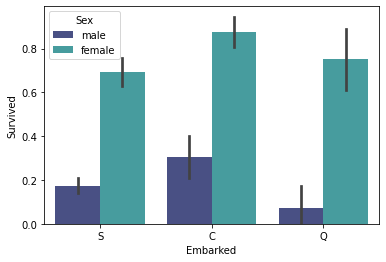

In [21]:
sns.barplot(x=df['Embarked'],y=df['Survived'],hue=df['Sex'],palette='mako')

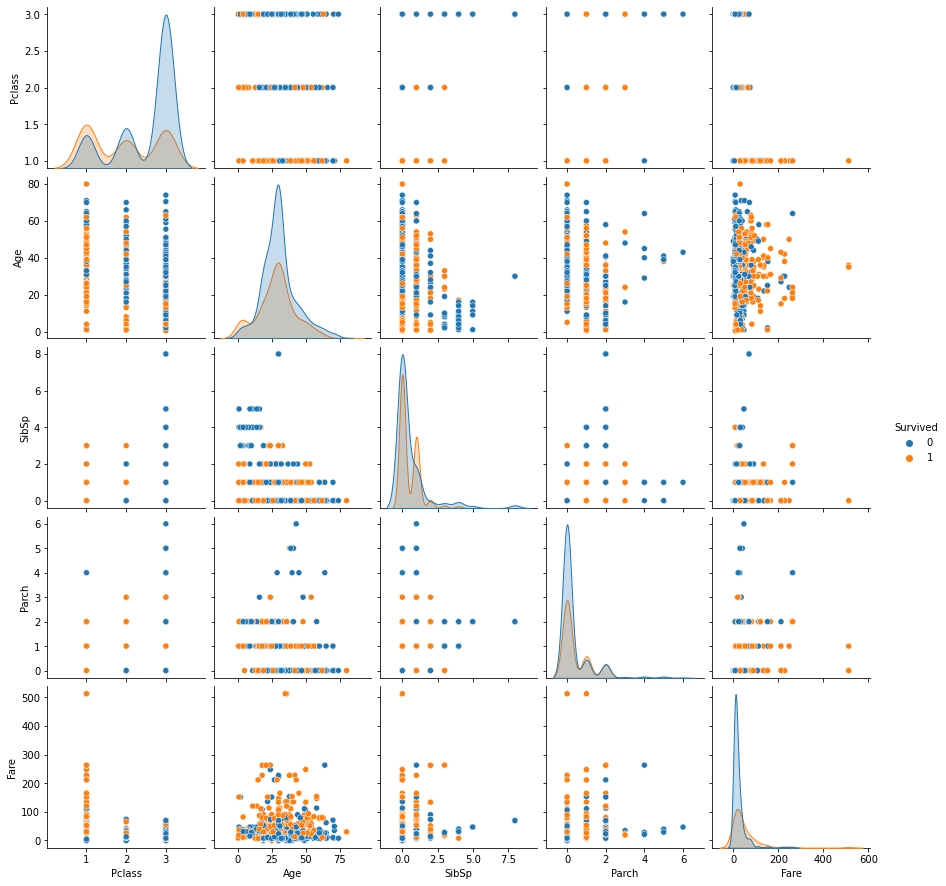

In [22]:
sns.pairplot(df,hue='Survived')

There is some noise in the data and the data is not normazlized

### Checking Correlation

In [23]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.070657,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.329727,0.083081,0.018443,-0.549500
Age,-0.070657,-0.329727,1.000000,-0.232440,-0.180330,0.090632
SibSp,-0.035322,0.083081,-0.232440,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.180330,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.090632,0.159651,0.216225,1.000000


<AxesSubplot:>

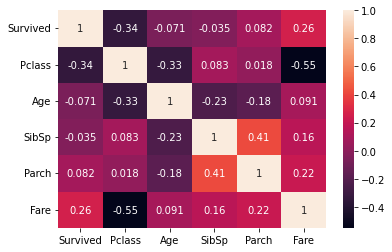

In [24]:
sns.heatmap(df.corr(),annot=True)

We see that features are both positively and negitively correlated with target variables...Fare has the highest correlation with survival and Pclass the highest negitive correlation... where as Age, Parch and Sibsp have the least correlation

### Checking Distribution and Skewness

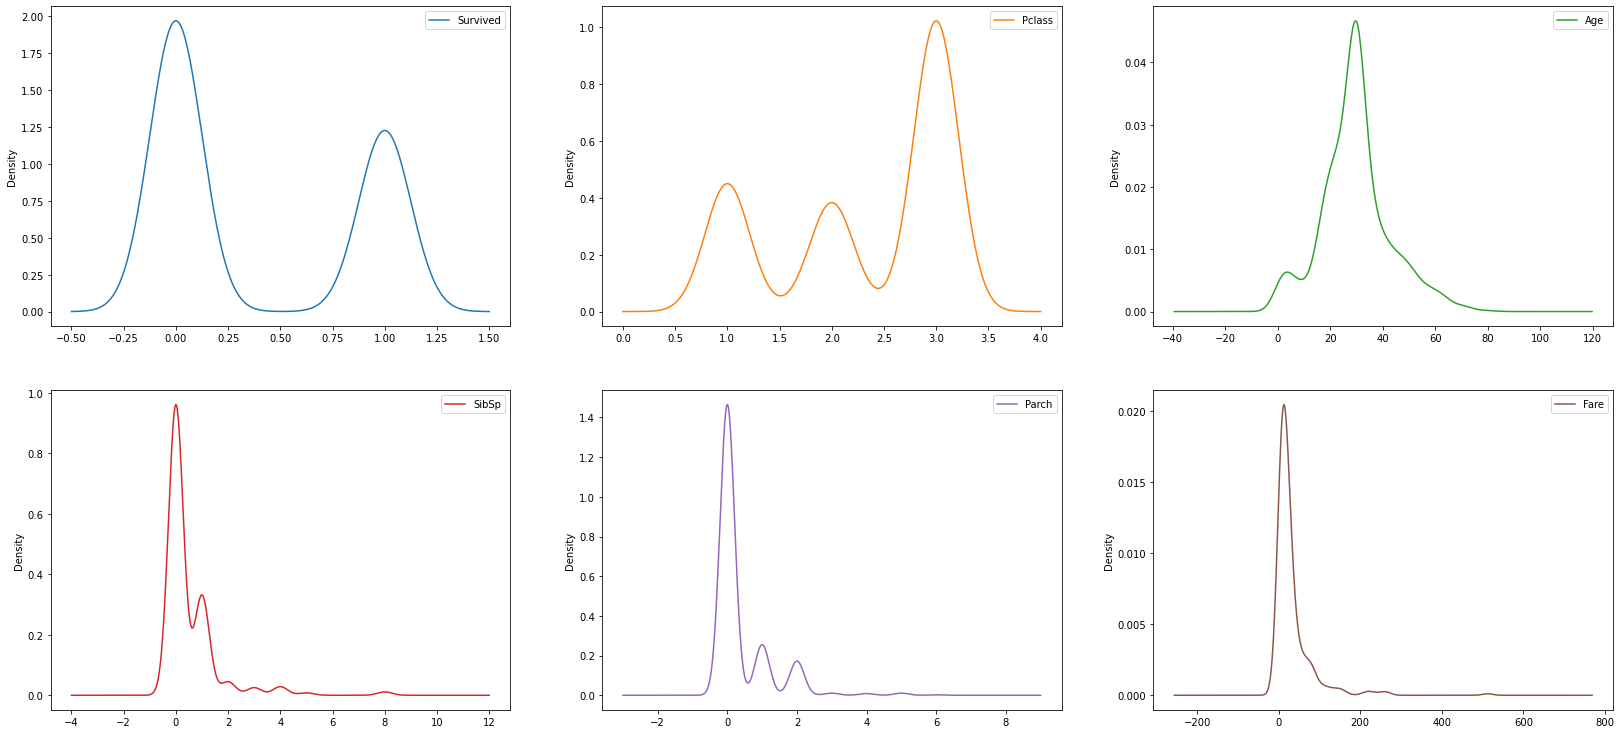

In [25]:
df.plot(kind='density',subplots=True,layout=(3,3),figsize=(28,20),sharex=False)
plt.show()

In [26]:
df.skew().sort_values(ascending=True)

Pclass     -0.630548
Age         0.420613
Survived    0.478523
Parch       2.749117
SibSp       3.695352
Fare        4.787317
dtype: float64

lets set the threshold to be 0.7 for skewness.
From graph and the skewness values above we see that SibSp,Parch and Fare are above the threshold

### Encoding Categorical Columns

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [28]:
df = pd.get_dummies(df,columns=['Sex'])

In [29]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,S,0,1
1,1,1,38.0,1,0,71.2833,C,1,0
2,1,3,26.0,0,0,7.9250,S,1,0
3,1,1,35.0,1,0,53.1000,S,1,0
4,0,3,35.0,0,0,8.0500,S,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,S,0,1
887,1,1,19.0,0,0,30.0000,S,1,0
888,0,3,30.0,1,2,23.4500,S,1,0
889,1,1,26.0,0,0,30.0000,C,0,1


In [30]:
from sklearn.preprocessing import OrdinalEncoder
oenc = OrdinalEncoder()
df['Embarked'] = oenc.fit_transform(df['Embarked'].values.reshape(-1,1))
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,2.0,0,1
1,1,1,38.0,1,0,71.2833,0.0,1,0
2,1,3,26.0,0,0,7.9250,2.0,1,0
3,1,1,35.0,1,0,53.1000,2.0,1,0
4,0,3,35.0,0,0,8.0500,2.0,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,2.0,0,1
887,1,1,19.0,0,0,30.0000,2.0,1,0
888,0,3,30.0,1,2,23.4500,2.0,1,0
889,1,1,26.0,0,0,30.0000,0.0,0,1


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Embarked    891 non-null    float64
 7   Sex_female  891 non-null    uint8  
 8   Sex_male    891 non-null    uint8  
dtypes: float64(3), int64(4), uint8(2)
memory usage: 50.6 KB


We do not have any features that are object type anymore

### Checking outliers

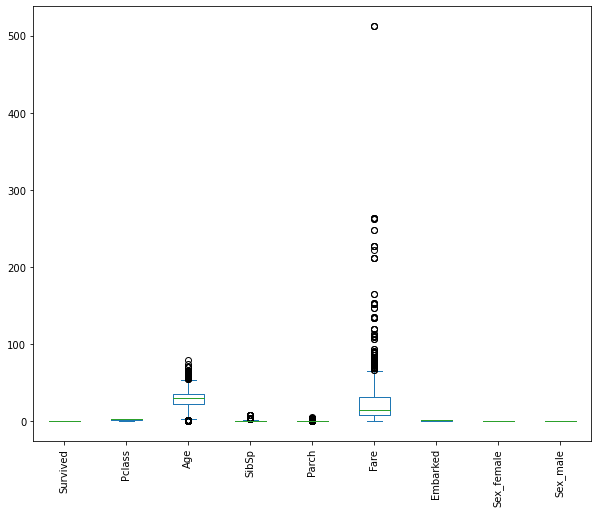

In [32]:
df.plot(kind='box',figsize=(10,8))
plt.xticks(rotation=90)
plt.show()

In [33]:
from scipy.stats import zscore

(np.abs(zscore(df)<3).all())

Survived       True
Pclass         True
Age           False
SibSp         False
Parch         False
Fare          False
Embarked       True
Sex_female     True
Sex_male       True
dtype: bool

From the box plot and zscore, we see outlier in Age,SibSp,Parch,Fare

##### Since SibSp,Parch have low correlation, have outliers and are not normalized we could remove them

In [34]:
df.drop(['SibSp','Parch'],axis=1,inplace=True)

### Removing outliers

In [35]:
z = np.abs(zscore(df))
z.shape

(891, 7)

In [36]:
df = df[(z<3).all(axis=1)]
df.shape

(864, 7)

### Percentage Data Loss

In [70]:
percentage_loss = (891-864)/891*100
percentage_loss

3.0303030303030303

### VIF

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [39]:
def calculate_vif(dataset):
    vif = pd.DataFrame()
    vif['Features'] = dataset.columns
    vif['VIF_Values'] = [variance_inflation_factor(dataset.values,i) for i in range(dataset.shape[1])] 
    return(vif)

In [40]:
Features = df.drop(['Survived','Sex_female','Sex_male','Embarked'],axis=1)
calculate_vif(Features)

,Features,VIF_Values
0,Pclass,3.221775
1,Age,4.374478
2,Fare,1.792727


We see all the values are below 10 

### Splitting the DataFrame in x and y

In [41]:
x = df.drop(['Survived'],axis=1)
x

,Pclass,Age,Fare,Embarked,Sex_female,Sex_male
0,3,22.0,7.2500,2.0,0,1
1,1,38.0,71.2833,0.0,1,0
2,3,26.0,7.9250,2.0,1,0
3,1,35.0,53.1000,2.0,1,0
4,3,35.0,8.0500,2.0,0,1
...,...,...,...,...,...,...
886,2,27.0,13.0000,2.0,0,1
887,1,19.0,30.0000,2.0,1,0
888,3,30.0,23.4500,2.0,1,0
889,1,26.0,30.0000,0.0,0,1


In [42]:
df.columns

Index(['Survived', 'Pclass', 'Age', 'Fare', 'Embarked', 'Sex_female',
       'Sex_male'],
      dtype='object')

In [43]:
y = df['Survived']
y.shape

(864,)

### Normalizing  using power_transform

In [44]:
from sklearn.preprocessing import power_transform
x_new = power_transform(x,method='yeo-johnson')

In [45]:
type(x_new)

numpy.ndarray

In [46]:
x = pd.DataFrame(x_new,columns=x.columns)
x

,Pclass,Age,Fare,Embarked,Sex_female,Sex_male
0,0.842705,-0.568666,-0.882769,0.597626,-0.733053,0.733053
1,-1.501903,0.697595,1.529038,-1.816819,1.364158,-1.364158
2,0.842705,-0.245140,-0.792444,0.597626,1.364158,-1.364158
3,-1.501903,0.465251,1.216581,0.597626,1.364158,-1.364158
4,0.842705,0.465251,-0.776493,0.597626,-0.733053,0.733053
...,...,...,...,...,...,...
859,-0.676050,-0.165087,-0.279691,0.597626,-0.733053,0.733053
860,-1.501903,-0.815241,0.607981,0.597626,1.364158,-1.364158
861,0.842705,0.073290,0.345275,0.597626,1.364158,-1.364158
862,-1.501903,-0.245140,0.607981,-1.816819,-0.733053,0.733053


In [47]:
x.skew()

Pclass       -0.480433
Age           0.023507
Fare         -0.009095
Embarked     -1.109262
Sex_female    0.632203
Sex_male     -0.632203
dtype: float64

Embarked has higher skewness but its a categorical column

### Scalling the model

In [48]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
x = mms.fit_transform(x)
x

array([[1.        , 0.36446303, 0.4326172 , 1.        , 0.        ,
        1.        ],
       [0.        , 0.60404105, 0.84833573, 0.        , 1.        ,
        0.        ],
       [1.        , 0.42567445, 0.44818628, 1.        , 1.        ,
        0.        ],
       ...,
       [1.        , 0.48592176, 0.64429273, 1.        , 1.        ,
        0.        ],
       [0.        , 0.42567445, 0.68957488, 0.        , 0.        ,
        1.        ],
       [1.        , 0.51572829, 0.44426959, 0.21239038, 0.        ,
        1.        ]])

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression

In [50]:
lr = LogisticRegression()
max_accuracy = 0
max_random_state = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=i)
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc> max_accuracy:
        max_accuracy = acc
        max_random_state = i
print('The best accuracy is ', max_accuracy ,'for random_state', max_random_state)

The best accuracy is  0.8728323699421965 for random_state 165


In [71]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=165)
lr = LogisticRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
accuracy = accuracy_score(y_test,pred)
print(accuracy)
print(classification_report(y_test,pred))

0.8728323699421965
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       106
           1       0.86      0.81      0.83        67

    accuracy                           0.87       173
   macro avg       0.87      0.86      0.86       173
weighted avg       0.87      0.87      0.87       173



In [72]:
from sklearn.model_selection import cross_val_score

for j in range(2,10):
    cv = cross_val_score(lr,x,y,cv=j)
    cv_score = cv.mean()
    print('at',j,'cross validation score is',cv_score,'and the accuracy is',accuracy)

at 2 cross validation score is 0.7731481481481481 and the accuracy is 0.8728323699421965
at 3 cross validation score is 0.7858796296296297 and the accuracy is 0.8728323699421965
at 4 cross validation score is 0.7881944444444444 and the accuracy is 0.8728323699421965
at 5 cross validation score is 0.7893601290496035 and the accuracy is 0.8728323699421965
at 6 cross validation score is 0.7916666666666666 and the accuracy is 0.8728323699421965
at 7 cross validation score is 0.7939567644524371 and the accuracy is 0.8728323699421965
at 8 cross validation score is 0.7928240740740741 and the accuracy is 0.8728323699421965
at 9 cross validation score is 0.792824074074074 and the accuracy is 0.8728323699421965


max cv score is at cv 6

In [53]:
from sklearn.metrics import plot_confusion_matrix

In [73]:
def Model(model):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=14)
    model.fit(x_test,y_test)
    pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,pred)
    cv = cross_val_score(model,x,y,cv=6)
    cv_score = cv.mean()
    print('Report for model', model)
    print('The Accuracy Score is', accuracy)
    print(classification_report(y_test,pred))
    print('Cross Validation Score is ', cv_score)

In [74]:
Model(lr)

Report for model LogisticRegression()
The Accuracy Score is 0.8439306358381503
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       107
           1       0.82      0.76      0.79        66

    accuracy                           0.84       173
   macro avg       0.84      0.83      0.83       173
weighted avg       0.84      0.84      0.84       173

Cross Validation Score is  0.7916666666666666


In [75]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
Model(knn)

Report for model KNeighborsClassifier()
The Accuracy Score is 0.8728323699421965
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       107
           1       0.88      0.77      0.82        66

    accuracy                           0.87       173
   macro avg       0.87      0.85      0.86       173
weighted avg       0.87      0.87      0.87       173

Cross Validation Score is  0.8055555555555557


In [76]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
Model(dtc)

Report for model DecisionTreeClassifier()
The Accuracy Score is 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       107
           1       1.00      1.00      1.00        66

    accuracy                           1.00       173
   macro avg       1.00      1.00      1.00       173
weighted avg       1.00      1.00      1.00       173

Cross Validation Score is  0.7696759259259259


In [77]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
Model(rfc)

Report for model RandomForestClassifier()
The Accuracy Score is 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       107
           1       1.00      1.00      1.00        66

    accuracy                           1.00       173
   macro avg       1.00      1.00      1.00       173
weighted avg       1.00      1.00      1.00       173

Cross Validation Score is  0.8020833333333334


In [78]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
Model(etc)

Report for model ExtraTreesClassifier()
The Accuracy Score is 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       107
           1       1.00      1.00      1.00        66

    accuracy                           1.00       173
   macro avg       1.00      1.00      1.00       173
weighted avg       1.00      1.00      1.00       173

Cross Validation Score is  0.7962962962962964


In [79]:
from sklearn.svm import SVC
svc = SVC()
Model(svc)

Report for model SVC()
The Accuracy Score is 0.8439306358381503
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       107
           1       0.82      0.76      0.79        66

    accuracy                           0.84       173
   macro avg       0.84      0.83      0.83       173
weighted avg       0.84      0.84      0.84       173

Cross Validation Score is  0.8090277777777777


### HyperParameter Tuning

In [80]:
from sklearn.model_selection import GridSearchCV

Parameters = {'C': [10**-2, 10**-1, 10**0, 10**1, 10**2],'kernel':['linear', 'poly', 'rbf', 'sigmoid'],'class_weight': [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]}
gcv = GridSearchCV(svc,Parameters,cv=3,scoring="accuracy",return_train_score=False,verbose=1)
gcv.fit(x_train,y_train)
gcv.best_params_

Fitting 3 folds for each of 80 candidates, totalling 240 fits


{'C': 1, 'class_weight': None, 'kernel': 'rbf'}

In [81]:
gcv.best_estimator_

SVC(C=1)

In [83]:
svc = SVC(C=1)

Model(svc)


Report for model SVC(C=1)
The Accuracy Score is 0.8439306358381503
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       107
           1       0.82      0.76      0.79        66

    accuracy                           0.84       173
   macro avg       0.84      0.83      0.83       173
weighted avg       0.84      0.84      0.84       173

Cross Validation Score is  0.8090277777777777


### Final Model : SVC

Report for model SVC(C=1)
The Accuracy Score is 0.8439306358381503
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       107
           1       0.82      0.76      0.79        66

    accuracy                           0.84       173
   macro avg       0.84      0.83      0.83       173
weighted avg       0.84      0.84      0.84       173

Cross Validation Score is  0.8090277777777777


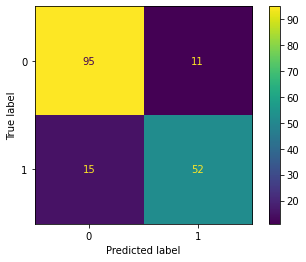

In [84]:
svc = SVC(C=1)
Model(svc)

plot_confusion_matrix(svc,x_test,y_test)

### ROC AUC Plot

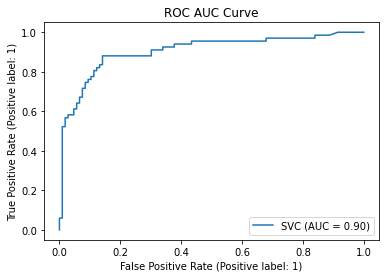

In [85]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(svc,x_test,y_test)
plt.title('ROC AUC Curve')
plt.show()

Final Accuracy is 86% and AUC is 90%

### Saving the model

In [87]:
import pickle
filename = 'Titanic_Survival'
pickle.dump(svc,open(filename,'wb'))